<a href="https://colab.research.google.com/github/tsolus/AvilaBible/blob/main/Project_Vendroux_Solus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
import math
import seaborn as sns
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.palettes import Category20c
from bokeh.transform import cumsum
from bokeh.layouts import row
from bokeh.palettes import Paired, inferno, BuPu5
from bokeh.models import BoxZoomTool, ResetTool
output_notebook()

In [2]:
from os.path import isdir
if not isdir('avila'):
  !curl 'https://archive.ics.uci.edu/ml/machine-learning-databases/00459/avila.zip' --output avila.zip
  !unzip avila.zip
  !rm avila.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  570k  100  570k    0     0   746k      0 --:--:-- --:--:-- --:--:--  746k
Archive:  avila.zip
   creating: avila/
  inflating: avila/avila-tr.txt      
  inflating: avila/avila-ts.txt      
  inflating: avila/avila-description.txt  


In [3]:
data = pd.read_csv('avila/avila-tr.txt', sep=',')
col = np.array(data.columns)
data.columns=['intercol', 'up_margin', 'low_margin', 'exploitation', 'row_number', 'mod_ratio', 'interline', 'weight', 'peak_number', 'mod_ratio/interline', 'class']
dic = {data.columns[i] : col[i] for i in range(len(col))}
data.append(dic, ignore_index = True)

,intercol,up_margin,low_margin,exploitation,row_number,mod_ratio,interline,weight,peak_number,mod_ratio/interline,class
0,0.130292,0.870736,-3.21053,0.062493,0.261718,1.43606,1.46594,0.636203,0.282354,0.515587,A
1,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
2,0.031541,0.2976,-3.21053,-0.58359,-0.721442,-0.307984,0.710932,1.05169,0.594169,-0.533994,A
3,0.229043,0.807926,-0.052442,0.082634,0.261718,0.14879,0.635431,0.051062,0.032902,-0.086652,F
4,0.117948,-0.220579,-3.21053,-1.62324,0.261718,-0.349509,0.257927,-0.385979,-0.247731,-0.33131,A
...,...,...,...,...,...,...,...,...,...,...,...
10425,0.25373,-0.338346,0.352988,-1.15424,0.17234,-0.557133,0.257927,0.348428,0.032902,-0.527134,F
10426,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.08849,-0.590727,0.580142,A
10427,-0.301743,0.352558,0.288973,1.63818,0.261718,0.688613,0.069175,0.502761,0.62535,0.718969,E
10428,-0.104241,-1.0371,0.388552,-1.09931,0.17234,-0.307984,0.786433,-1.33755,0.999528,-0.551063,X


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10429 entries, 0 to 10428
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   intercol             10429 non-null  float64
 1   up_margin            10429 non-null  float64
 2   low_margin           10429 non-null  float64
 3   exploitation         10429 non-null  float64
 4   row_number           10429 non-null  float64
 5   mod_ratio            10429 non-null  float64
 6   interline            10429 non-null  float64
 7   weight               10429 non-null  float64
 8   peak_number          10429 non-null  float64
 9   mod_ratio/interline  10429 non-null  float64
 10  class                10429 non-null  object 
dtypes: float64(10), object(1)
memory usage: 896.4+ KB


In [5]:
data.describe()

,intercol,up_margin,low_margin,exploitation,row_number,mod_ratio,interline,weight,peak_number,mod_ratio/interline
count,10429.000000,10429.000000,10429.000000,10429.000000,10429.000000,10429.000000,10429.000000,10429.000000,10429.000000,10429.000000
mean,0.000827,0.033630,-0.000556,-0.002433,0.006354,0.013948,0.005570,0.010234,0.012891,0.000803
std,0.991475,3.921056,1.120251,1.008564,0.992100,1.126296,1.313812,1.003515,1.087715,1.007141
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.542001,-0.372457,-0.516103
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111754,0.064084,-0.034621
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654900,0.500624,0.530885
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


The dataset is supposed to be standardized, but we can see that the standard deviation of the upper margin is way above 1 and the max is 386.
It probably means there is a value we need to ge rid of.
Let us check this with a quick plot.

In [6]:
import plotly.express as px
px.box(x=data['up_margin'], orientation='h', height=200, color_discrete_sequence = px.colors.qualitative.Antique)

As we can see, the is a value that we need to get rid of.


In [7]:
data = data[data['up_margin'] < 50]
data.describe()
px.box(x=data['up_margin'], orientation='h', height=200, color_discrete_sequence = px.colors.qualitative.Antique)

In [8]:
count = data["class"].value_counts()
index = data["class"].value_counts().index

In [9]:

x = {index[i] : count[i] for i in range(len(count))}

df = pd.Series(x).reset_index(name='value').rename(columns={'index':'count'})
df['color'] = Category20c[len(x)]

# represent each value as an angle = value / total * 2pi
df['angle'] = df['value']/df['value'].sum() * 2*math.pi

p = figure(plot_height=350,  width = 425, title="Occurence of each class in the dataset", toolbar_location=None,
           tools="hover", tooltips="@count: @value")

p.wedge(x=0, y=1, radius=0.4, 
        
        # use cumsum to cumulatively sum the values for start and end angles
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='count', source=df)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

t = figure(x_range=list(index), height=350, width = 425 ,title="Occurence of each class in the dataset",
           toolbar_location=None, tools="hover",  tooltips="@x: @top")

t.vbar(x=index, top=count, width=0.5, color = inferno(12))

t.xgrid.grid_line_color = None
t.y_range.start = 0

show(row(t, p))

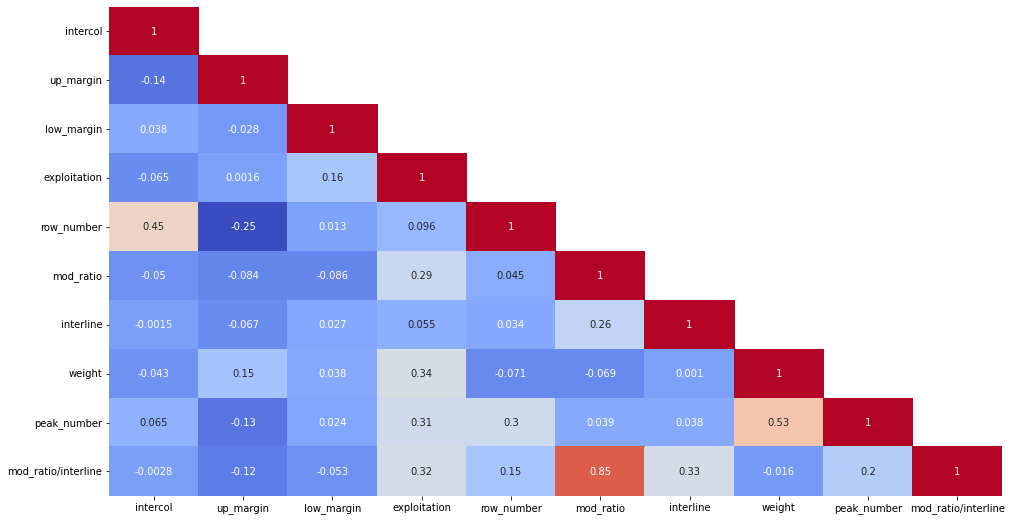

In [10]:
plt.figure(figsize=(16,9))
corr=data.corr()
matrix = np.logical_not(np.tril(np.ones_like(corr, dtype=np.bool)))
sns.heatmap(corr, annot=True, cbar=False, cmap='coolwarm', mask=matrix)

Without any surprises, mod_ration/interline and mod_ratio are highly correlated. Moreover mod_ration/interline get a very low correlation with all the others data so we can concludse that this value is not very usefull. We can also see that peak_number/weight and Interline/Up marging are pretty highly correlated.

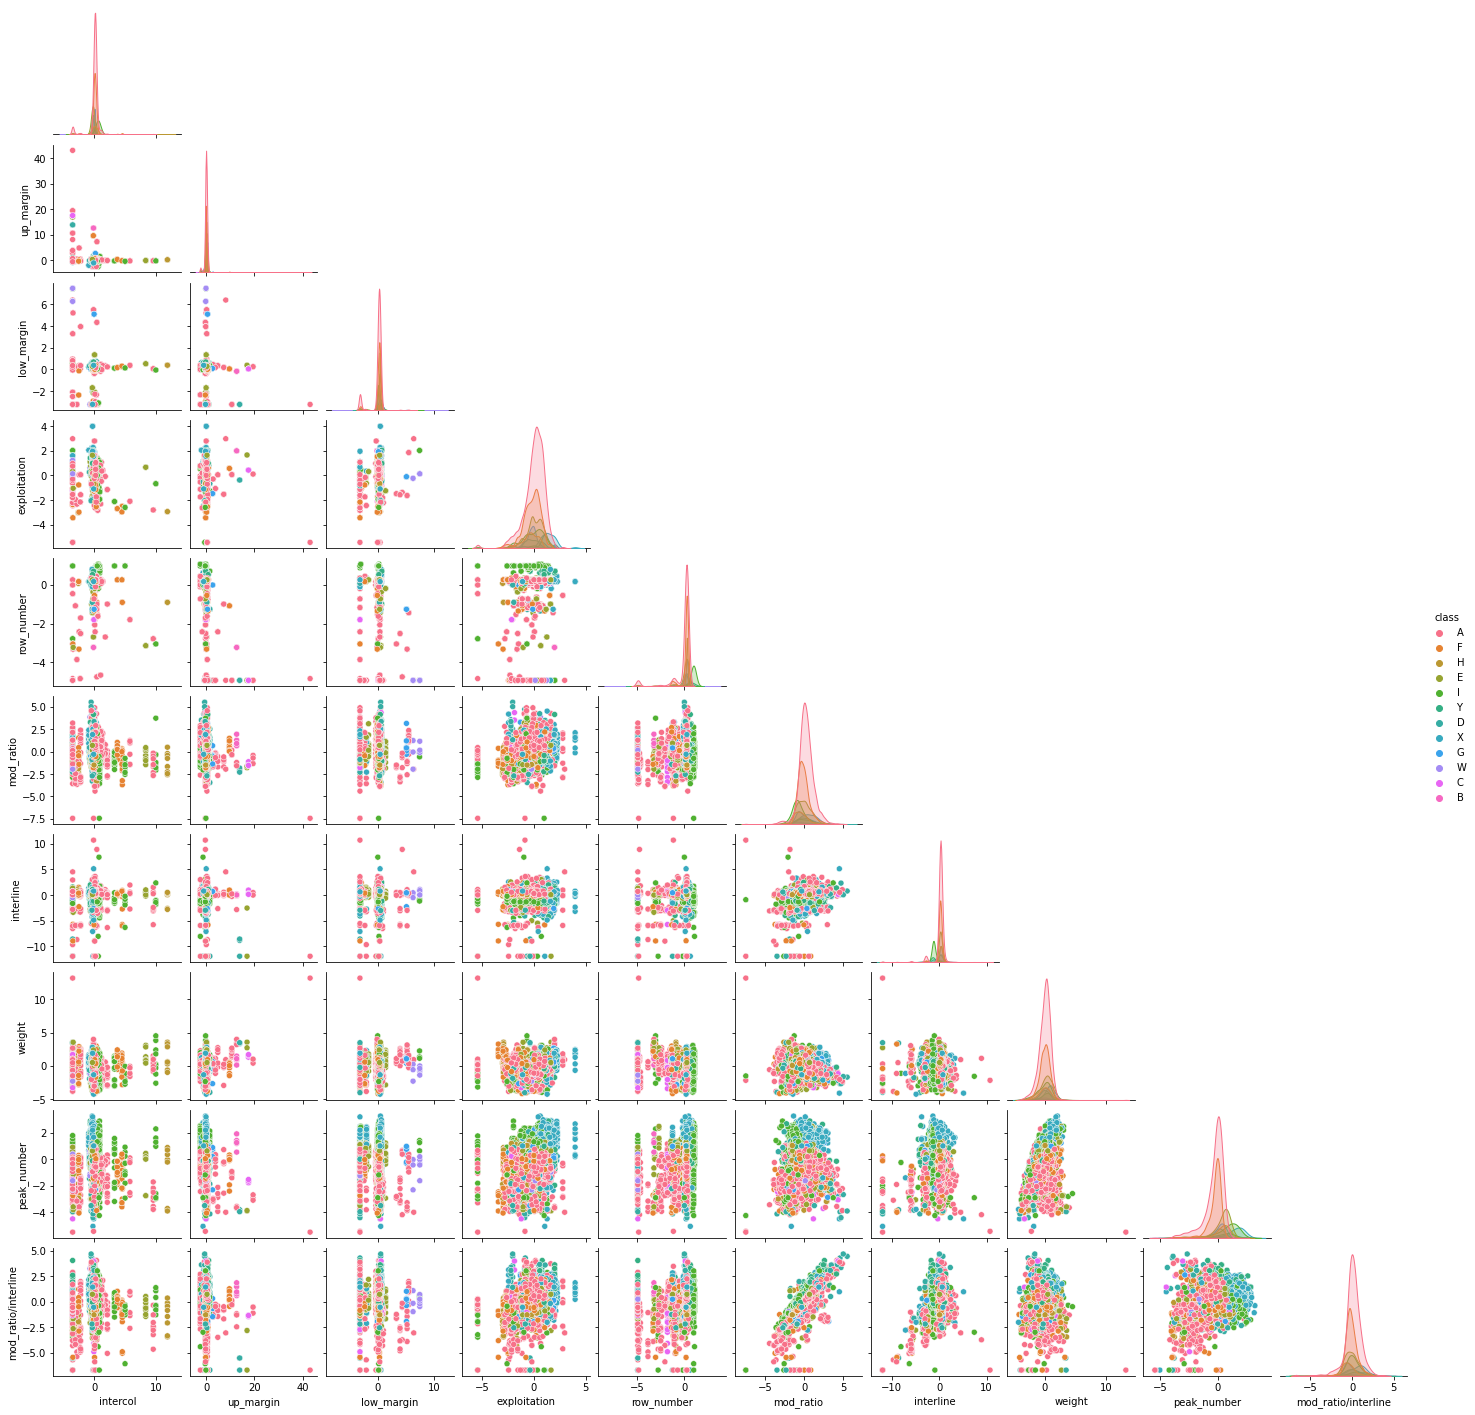

In [11]:
sns.pairplot(data, diag_kind='kde', corner=True, hue = "class", height= 2, aspect = 1)

In [12]:
data = data.drop("mod_ratio/interline", axis=1)
X_train = data.drop("class",axis=1)
Y_train = data["class"]

In [13]:
test = pd.read_csv('avila/avila-ts.txt', sep=',')
col = np.array(test.columns)
test.columns=['intercol', 'up_margin', 'low_margin', 'exploitation', 'row_number', 'mod_ratio', 'interline', 'weight', 'peak_number', 'mod_ratio/interline', 'class']
dic = {test.columns[i] : col[i] for i in range(len(col))}
test.append(dic, ignore_index = True)

test = test.drop("mod_ratio/interline", axis=1)
X_test = test.drop("class",axis=1)
Y_test = test["class"]
count_test = test["class"].value_counts()
x = {index[i] : count_test[i] for i in range(len(count))}

In [14]:
scores_modeles = pd.DataFrame(columns=['model_name', 'score'])

In [15]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

In [16]:
def test_hyperparametres(algo,hyperparametres):
    grid= GridSearchCV(algo, hyperparametres, n_jobs=-1)
    grid.fit(X_train, Y_train)
    print(grid.best_score_,grid.best_estimator_)
    return grid.best_score_,grid.best_estimator_

In [17]:
def plot_y_pred_count(y_pred, title):
  count2 = [y_pred.count(i) for i in index]
  x_pred = {index[i] : count2[i] for i in range(len(count))}

  p = figure(x_range=list(index), height=350, width = 425 ,title=("Occurence of each class estimated with" + title),
            toolbar_location=None, tools="hover",  tooltips="@x: @top")

  p.vbar(x=index, top=count2, width=0.5, color = inferno(12))

  p.xgrid.grid_line_color = None
  p.y_range.start = 0

  t = figure(x_range=list(index), height=350, width = 425 ,title="Occurence of each class in the test dataset",
            toolbar_location=None, tools="hover",  tooltips="@x: @top")

  t.vbar(x=index, top=count_test, width=0.5, color = inferno(12))

  t.xgrid.grid_line_color = None
  t.y_range.start = 0

  show(row(t, p))

In [18]:
def test_fitting(score_test, score_train):
 
  title = "Great Fitting"
  if (score_train > score_test+0.1):
    title = "Overfitting"
  if (score_test > score_train+0.1):
    title = "Underfitting"
  
  p = figure(x_range=list(["Test", "Train"]), height=350, width = 425 ,title=("Test Model Score vs Train Model Score : " + title),
            toolbar_location=None, tools="hover",  tooltips="@x: @top")

  p.vbar(x=np.array(["Test", "Train"]), top=np.array([score_test, score_train]), width=0.5, color = inferno(2))

  p.xgrid.grid_line_color = None
  p.y_range.start = 0

  show(p)


Logisitic Regression

In [19]:
grid_params={"C":[10,25, 50], "penalty":["none","l2"]}
g_bsLR, g_beLR = test_hyperparametres(LogisticRegression(max_iter=12000), grid_params)

0.5570582460206331 LogisticRegression(C=10, max_iter=12000)


In [20]:
g_beLR = LogisticRegression(C=100.0, max_iter=12000)
logreg = g_beLR
modele = logreg.fit(X_train, Y_train)
predictions = modele.predict(X_test)

In [21]:
score = modele.score(X_test,Y_test)
scoreDF = pd.DataFrame({'model_name': ['RegLog'],'score': [score]})
scores_modeles=scores_modeles.append(scoreDF,ignore_index=True)

In [22]:
test_fitting(float(scores_modeles[scores_modeles.model_name == 'RegLog'].score), g_bsLR)

In [23]:
y_pred_LR = list(cross_val_predict(g_beLR, X_test, Y_test, cv=5))
plot_y_pred_count(y_pred_LR, " Logistic Regression")

Support Vector Machines

In [25]:
svc_params = {'C': [3000, 1000, 500]}
g_bsSVC, g_beSVM = test_hyperparametres(SVC(), svc_params)

0.8387998096249751 SVC(C=3000)


In [26]:
#g_beSVM = SVC(C=3000)
svc = g_beSVM
modele = svc.fit(X_train, Y_train)
predictions = modele.predict(X_test)

In [27]:
score = modele.score(X_test,Y_test)
scoreDF = pd.DataFrame({'model_name': ['SVC'],'score': [score]})
scores_modeles=scores_modeles.append(scoreDF,ignore_index=True)

In [28]:
test_fitting(float(scores_modeles[scores_modeles.model_name == 'SVC'].score), g_bsSVC)

In [29]:
y_pred_SVM = list(cross_val_predict(g_beSVM, X_test, Y_test, cv=5))
plot_y_pred_count(y_pred_SVM, " SVM")

Random forests

In [ ]:
random_params = {'bootstrap': [False],
 'max_features': ['sqrt','log2', 'auto'],
 'n_estimators': [500, 1000]}
g_bsRF, g_beRF = test_hyperparametres(RandomForestClassifier(), random_params)

0.993575578655005 RandomForestClassifier(bootstrap=False, max_features='sqrt', n_estimators=500)


In [30]:
g_beRF = RandomForestClassifier(bootstrap=False, max_features='sqrt', n_estimators=500)
g_bsRF = 0.993575578655005
random_forest = g_beRF
modele = random_forest.fit(X_train, Y_train)
predictions = modele.predict(X_test)

In [31]:
score = modele.score(X_test, Y_test)
scoreDF = pd.DataFrame({'model_name': ['RandomForest'],'score': [score]})
scores_modeles=scores_modeles.append(scoreDF,ignore_index=True)

In [32]:
y_pred_RF = list(cross_val_predict(g_beRF, X_test, Y_test, cv=5))
plot_y_pred_count(y_pred_RF, "Random Forrest")

In [33]:
test_fitting(float(scores_modeles[scores_modeles.model_name == 'RandomForest'].score), g_bsRF)

KNN

In [34]:
knn_params = {"n_neighbors" : [1, 2, 5, 10], 'p': [1, 2, 3], 'algorithm' : ['auto', 'ball_tree', 'kd_tree']}
g_bsKNN, g_beKNN = test_hyperparametres(KNeighborsClassifier(), knn_params)

0.8656504594981733 KNeighborsClassifier(n_neighbors=1, p=1)


In [35]:
#g_beKNN = KNeighborsClassifier(n_neighbors=1, p=1)
#g_bsKNN = 0.8656504594981733
knn =g_beKNN
modele = knn.fit(X_train, Y_train)
predictions = modele.predict(X_test)

In [36]:
score = modele.score(X_test,Y_test)
scoreDF = pd.DataFrame({'model_name': ['knn'],'score': [score]})
scores_modeles=scores_modeles.append(scoreDF,ignore_index=True)

In [37]:
y_pred_KNN = list(cross_val_predict(g_beKNN, X_test, Y_test, cv=5))
plot_y_pred_count(y_pred_KNN, "KNN")

In [38]:
test_fitting(float(scores_modeles[scores_modeles.model_name == 'knn'].score), g_bsKNN)

Gaussian Naive Bayes

In [39]:
GNB_params = {}
g_bsGNB, g_beGNB = test_hyperparametres(GaussianNB(), GNB_params)

0.3252776647330266 GaussianNB()


In [40]:
gaussian = GaussianNB()
modele = gaussian.fit(X_train, Y_train)
predictions = modele.predict(X_test)

In [41]:
score = modele.score(X_test,Y_test)
scoreDF = pd.DataFrame({'model_name': ['gauss'],'score': [score]})
scores_modeles=scores_modeles.append(scoreDF,ignore_index=True)

In [42]:
test_fitting(float(scores_modeles[scores_modeles.model_name == 'gauss'].score), g_bsGNB)

In [43]:
y_pred_GNB = list(cross_val_predict(g_beGNB, X_test, Y_test, cv=5))
plot_y_pred_count(y_pred_GNB, "Gaussian Nayves Bayes")

In [44]:
scores_modeles

,model_name,score
0,RegLog,0.554235
1,SVC,0.852146
2,RandomForest,0.993676
3,knn,0.878593
4,gauss,0.325700


In [45]:
scores_modeles = scores_modeles.sort_values(by = ["score"], axis = 0, ascending= False)
t = figure(x_range=list(scores_modeles["model_name"]), height=350, width = 425 ,title="Score of each model",
            toolbar_location="right", tools="hover",  tooltips="@x: @top")

t.vbar(x=scores_modeles["model_name"], top=scores_modeles["score"], width=0.5, color = BuPu5)
t.add_tools(BoxZoomTool())
t.add_tools(ResetTool())
t.xgrid.grid_line_color = None
t.y_range.start = 0
show(t)